In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.utils import shuffle

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('Tweets.csv', engine='python', encoding="utf-8", on_bad_lines="skip")
data = data[['airline_sentiment', 'text']]
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


In [4]:
data = data.rename(columns={'text': 'content', 'airline_sentiment': 'sentiment'})

In [5]:
import re

data['content'] = data['content'].apply(lambda x: ' '.join(word for word in x.split() if not word.startswith('@')))
data.head()

,sentiment,content
0,neutral,What said.
1,positive,plus you've added commercials to the experienc...
2,neutral,I didn't today... Must mean I need to take ano...
3,negative,"it's really aggressive to blast obnoxious ""ent..."
4,negative,and it's a really big bad thing about it


In [6]:
def swap_columns(data, i, j):
    cols = data.columns.tolist()
    cols[i], cols[j] = cols[j], cols[i]
    data = data[cols]
    return data


data = swap_columns(data, 0, 1)
data.head()

,content,sentiment
0,What said.,neutral
1,plus you've added commercials to the experienc...,positive
2,I didn't today... Must mean I need to take ano...,neutral
3,"it's really aggressive to blast obnoxious ""ent...",negative
4,and it's a really big bad thing about it,negative


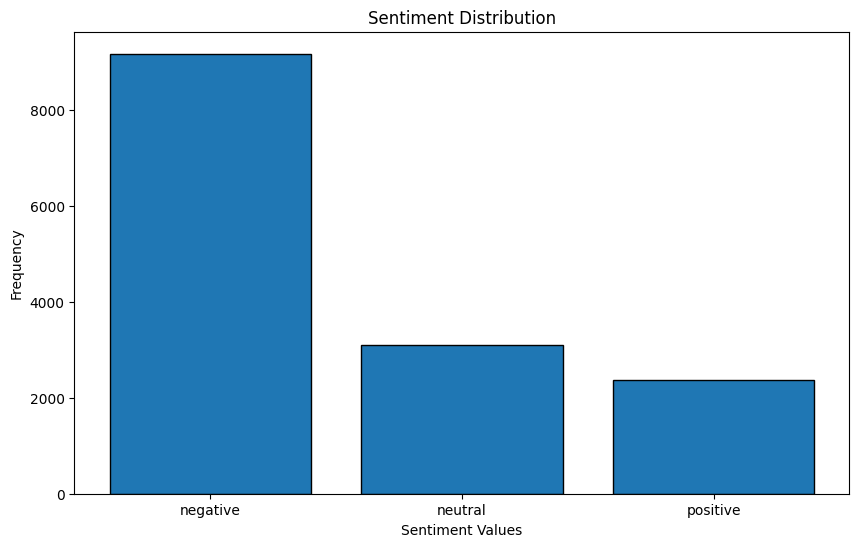

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

hist_data = data['sentiment'].value_counts()

plt.bar(hist_data.index, hist_data, edgecolor='black')

plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Values')
plt.ylabel('Frequency')

plt.show();

In [9]:
labeled_tweets, unlabeled_tweets = train_test_split(data, train_size=0.8, random_state=56)

In [10]:
labeled_tweets.head()

,content,sentiment
13970,its Adolfo Garcia,neutral
5272,Left my computer on the plane. Two weeks Late ...,positive
11156,thanks,positive
9457,"horrible service, wrong plane arrived, many co...",negative
3411,They inquire and then do nothing about it...pr...,negative


In [11]:
unlabeled_tweets.head()

,content,sentiment
4031,I've been doing this for 15 years and I've nev...,negative
12367,please can you tell me why DFW has a weather a...,neutral
13168,dmed back,neutral
10344,stranded at BWI after two diversions. No cust ...,negative
1737,make sure you take care of team &amp; team. We...,neutral


In [12]:
def train_model(labeled_data):
    vect = TfidfVectorizer()
    x = vect.fit_transform(labeled_data['content'])
    y = labeled_data['sentiment']
    model = LogisticRegression(solver='lbfgs', max_iter=1000)
    model.fit(x,y)
    return model, vect

model, vect = train_model(labeled_tweets)

In [13]:
x_unlabeled = vect.transform(unlabeled_tweets['content'])
y_unlabeled_predicted = model.predict(x_unlabeled)

In [14]:
y_unlabeled_proba = model.predict_proba(x_unlabeled)
uncertainly = -(y_unlabeled_proba * np.log2(y_unlabeled_proba)).sum(axis=1)

In [15]:
uncertainly

array([0.40994895, 0.97649038, 1.43642741, ..., 1.22071223, 1.19408586,
       0.75666912])

In [16]:
labeled_tweets_new = unlabeled_tweets.iloc[uncertainly.argsort()[:100]]
unlabeled_tweets_new = unlabeled_tweets.iloc[uncertainly.argsort()[100:]]

In [17]:
labeled_tweets_new

,content,sentiment
8884,Great thanks,positive
11976,"great, thanks!",positive
11286,no your not!,negative
13641,"is terrible, my flights Cancelled Flighted and...",negative
13537,It's been 5 hours and still no call and now we...,negative
...,...,...
7346,4 hr delay on flight to JFK via Tampa &amp; wo...,negative
11294,can you explain why I am on hold over an hour ...,negative
13743,"Flight Cancelled Flightled, website refers to ...",negative
13320,"I understand that. But 14 hours Late Flightr, ...",negative


In [18]:
unlabeled_tweets_new

,content,sentiment
824,has once again let me down. Don't think I've e...,negative
1388,"after 2 days - 1 flight Cancelled Flightled, a...",negative
9044,thanks !!!,positive
11930,thanks!!,positive
9588,Thanks!,positive
...,...,...
3985,when will you offer real food in american club...,negative
6955,"Worked now, ty",positive
2808,thanks for moving my dad on to my my mom's fli...,positive
5896,just announced non-stop flights to Dallas from...,neutral


In [19]:
labeled_tweets = pd.concat([labeled_tweets, labeled_tweets_new])

In [20]:
labeled_tweets

,content,sentiment
13970,its Adolfo Garcia,neutral
5272,Left my computer on the plane. Two weeks Late ...,positive
11156,thanks,positive
9457,"horrible service, wrong plane arrived, many co...",negative
3411,They inquire and then do nothing about it...pr...,negative
...,...,...
7346,4 hr delay on flight to JFK via Tampa &amp; wo...,negative
11294,can you explain why I am on hold over an hour ...,negative
13743,"Flight Cancelled Flightled, website refers to ...",negative
13320,"I understand that. But 14 hours Late Flightr, ...",negative


In [21]:
model, vect = train_model(labeled_tweets)

In [22]:
reviews_test = unlabeled_tweets
reviews_test

,content,sentiment
4031,I've been doing this for 15 years and I've nev...,negative
12367,please can you tell me why DFW has a weather a...,neutral
13168,dmed back,neutral
10344,stranded at BWI after two diversions. No cust ...,negative
1737,make sure you take care of team &amp; team. We...,neutral
...,...,...
1839,Pushing 2 hours on hold. Priceless. http://t.c...,negative
2176,cabin pressurization issues are pretty serious...,negative
11714,YOU ARE THE BEST AIRWAYS! Follow me please!!!!...,positive
12060,Do you have any sort of live chat feature? We'...,neutral


In [23]:
x_test = vect.transform(reviews_test['content'])
y_test_predicted = model.predict(x_test)
y_test_predicted

array(['negative', 'negative', 'neutral', ..., 'positive', 'negative',
       'negative'], dtype=object)

In [24]:
f1 = f1_score(reviews_test['sentiment'], y_test_predicted, average='weighted')
f1

0.7973876759685788